In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time, math

In [60]:
filename = "DannieFourthClowning.txt"

In [11]:
filename = "WSAS07BASELINE.txt"

In [12]:
data = pd.read_json(filename)

In [13]:
data['address'] = pd.io.json.json_normalize(data[:]['message'])['address']
data['value'] = pd.io.json.json_normalize(data[:]['message'])['args']
data['value'] = data['value'].str[0]
data = data.drop(columns=['message'])

In [14]:
data.head()

,time,address,value
0,18349,/spr_beta_alpha,0.269819
1,18352,/spr_alpha_theta,0.294355
2,19026,/td_front_back,1.024677
3,38570,/spr_beta_alpha,0.268036
4,38573,/spr_alpha_theta,0.236174


In [15]:
data['time'] = data['time']/4;

In [16]:
data['time'] = data['time'].astype('int')

In [8]:
data.to_json(orient='index')

'{"0":{"time":4490,"address":"\\/spr_beta_alpha","value":0.2915885746},"1":{"time":4491,"address":"\\/spr_alpha_theta","value":0.2940101326},"2":{"time":4656,"address":"\\/td_front_back","value":1.1048494577},"3":{"time":9417,"address":"\\/spr_beta_alpha","value":0.2398335487},"4":{"time":9418,"address":"\\/spr_alpha_theta","value":0.307153672},"5":{"time":9425,"address":"\\/fp_wpli_left_midline","value":0.0871980637},"6":{"time":9426,"address":"\\/fp_wpli_left_lateral","value":0.043302387},"7":{"time":9426,"address":"\\/fp_wpli_right_midline","value":0.052274406},"8":{"time":9426,"address":"\\/fp_wpli_right_lateral","value":0.0777927861},"9":{"time":9569,"address":"\\/fp_dpli_left_midline","value":0.4965426028},"10":{"time":9569,"address":"\\/fp_dpli_left_lateral","value":0.4903680086},"11":{"time":9570,"address":"\\/fp_dpli_right_midline","value":0.5057612062},"12":{"time":9570,"address":"\\/fp_dpli_right_lateral","value":0.4997333288},"13":{"time":9586,"address":"\\/pe_frontal","val

In [7]:
data.head()

,time,address,value
0,4490,/spr_beta_alpha,0.291589
1,4491,/spr_alpha_theta,0.294010
2,4656,/td_front_back,1.104849
3,9417,/spr_beta_alpha,0.239834
4,9418,/spr_alpha_theta,0.307154


In [8]:
channels = [
    '/fp_dpli_left_midline',
    '/fp_dpli_left_lateral',
    '/fp_dpli_right_midline', 
    '/fp_dpli_right_lateral',
    '/fp_wpli_left_midline', 
    '/fp_wpli_left_lateral', 
    '/fp_wpli_right_midline', 
    '/fp_wpli_right_lateral', 
    '/hl_relative_position',
    '/pe_frontal', 
    '/pe_parietal', 
    '/pac_rpt_frontal', 
    '/pac_rpt_parietal', 
    '/spr_beta_alpha', 
    '/spr_alpha_theta', 
    '/td_front_back']

In [7]:
data.loc[data['address'] == channels[9]].head()

,time,address,value
14,39372,/pe_frontal,0.663514
31,79406,/pe_frontal,0.653896
48,119397,/pe_frontal,0.718564
66,159422,/pe_frontal,0.698816
83,199423,/pe_frontal,0.690120


Text(0.5, 1.0, 'dPLI, size: wPLI')

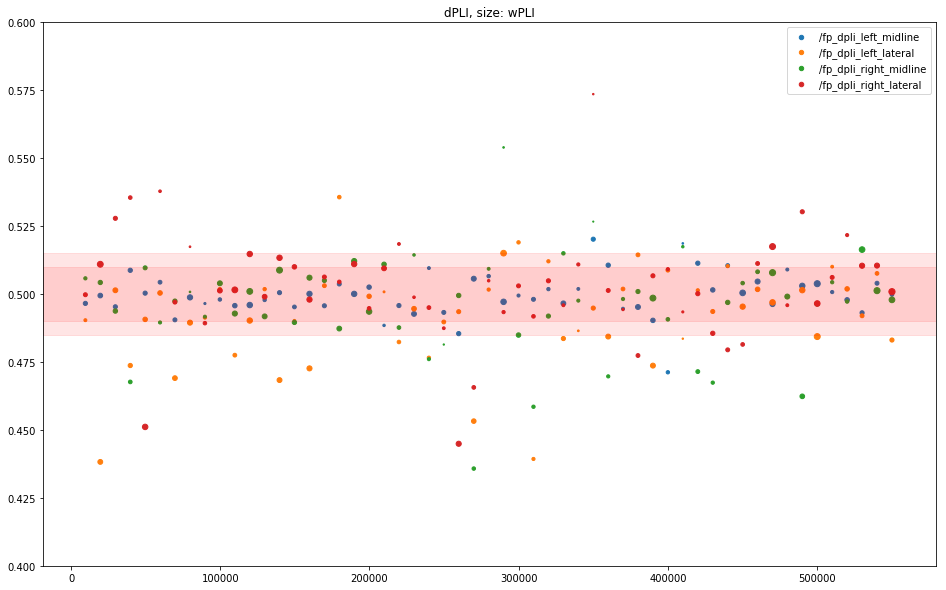

In [11]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set(ylim=(0.4, 0.6))
lm = plt.scatter(data.loc[data['address'] == channels[0]]['time'], data.loc[data['address'] == channels[0]]['value'], 
            s=data.loc[data['address'] == channels[4]]['value']*200)
ll = plt.scatter(data.loc[data['address'] == channels[1]]['time'], data.loc[data['address'] == channels[1]]['value'], 
            s=data.loc[data['address'] == channels[5]]['value']*200)
rm = plt.scatter(data.loc[data['address'] == channels[2]]['time'], data.loc[data['address'] == channels[2]]['value'], 
            s=data.loc[data['address'] == channels[6]]['value']*200)
rl = plt.scatter(data.loc[data['address'] == channels[3]]['time'], data.loc[data['address'] == channels[3]]['value'], 
            s=data.loc[data['address'] == channels[7]]['value']*200)
plt.legend((lm, ll, rm, rl), (channels[0], channels[1], channels[2], channels[3]))
plt.ymin = 0.4
plt.ymax = 0.6

plt.axhspan(0.485, 0.515, color='red', alpha=0.1)
plt.axhspan(0.49, 0.51, color='red', alpha=0.1)
plt.title('dPLI, size: wPLI')

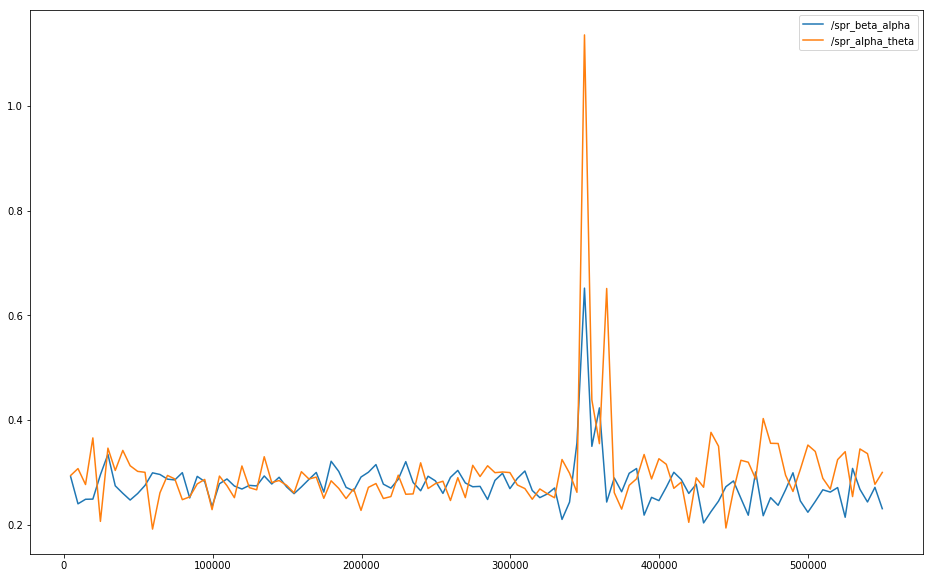

In [12]:
fig, ax = plt.subplots(figsize=(16,10))
ba = plt.plot(data.loc[data['address'] == channels[13]]['time'], data.loc[data['address'] == channels[13]]['value'], label=channels[13])
at = plt.plot(data.loc[data['address'] == channels[14]]['time'], data.loc[data['address'] == channels[14]]['value'], label=channels[14])
ax.legend()

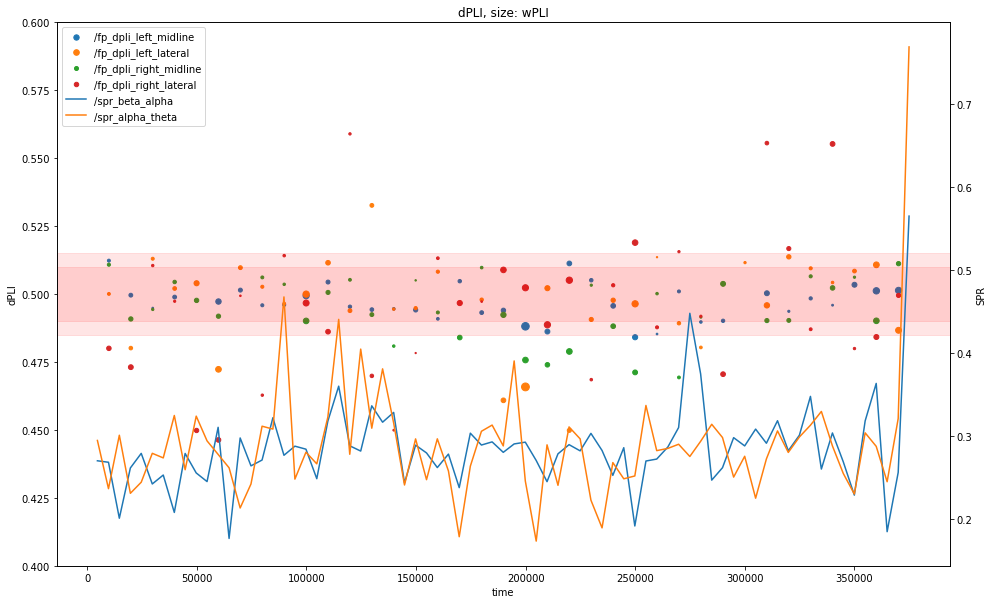

In [25]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set(ylim=(0.4, 0.6))
lm = plt.scatter(data.loc[data['address'] == channels[0]]['time'], data.loc[data['address'] == channels[0]]['value'], 
            s=data.loc[data['address'] == channels[4]]['value']*200)
ll = plt.scatter(data.loc[data['address'] == channels[1]]['time'], data.loc[data['address'] == channels[1]]['value'], 
            s=data.loc[data['address'] == channels[5]]['value']*200)
rm = plt.scatter(data.loc[data['address'] == channels[2]]['time'], data.loc[data['address'] == channels[2]]['value'], 
            s=data.loc[data['address'] == channels[6]]['value']*200)
rl = plt.scatter(data.loc[data['address'] == channels[3]]['time'], data.loc[data['address'] == channels[3]]['value'], 
            s=data.loc[data['address'] == channels[7]]['value']*200)
plt.ymin = 0.4
plt.ymax = 0.6
ax.set_ylabel('dPLI')
ax.set_xlabel('time')

plt.axhspan(0.485, 0.515, color='red', alpha=0.1)
plt.axhspan(0.49, 0.51, color='red', alpha=0.1)
plt.title('dPLI, size: wPLI')

ax2 = ax.twinx()
ba = plt.plot(data.loc[data['address'] == channels[13]]['time'], data.loc[data['address'] == channels[13]]['value'], label=channels[13])
at = plt.plot(data.loc[data['address'] == channels[14]]['time'], data.loc[data['address'] == channels[14]]['value'], label=channels[14])

ax2.set_ylabel('SPR')
handles, labels = ax2.get_legend_handles_labels()

plt.legend((lm, ll, rm, rl, handles[0], handles[1]), (channels[0], channels[1], channels[2], channels[3], channels[13], channels[14]))

In [77]:
data

,time,address,value
0,4332,/spr_beta_alpha,0.266613
1,4334,/spr_alpha_theta,0.111649
2,5038,/td_front_back,1.084872
3,9357,/spr_beta_alpha,0.429618
4,9360,/spr_alpha_theta,0.437742
5,9593,/fp_wpli_left_midline,0.038818
6,9596,/fp_wpli_left_lateral,0.053901
7,9597,/fp_wpli_right_midline,0.030111
8,9598,/fp_wpli_right_lateral,0.015262
9,10118,/td_front_back,1.219194


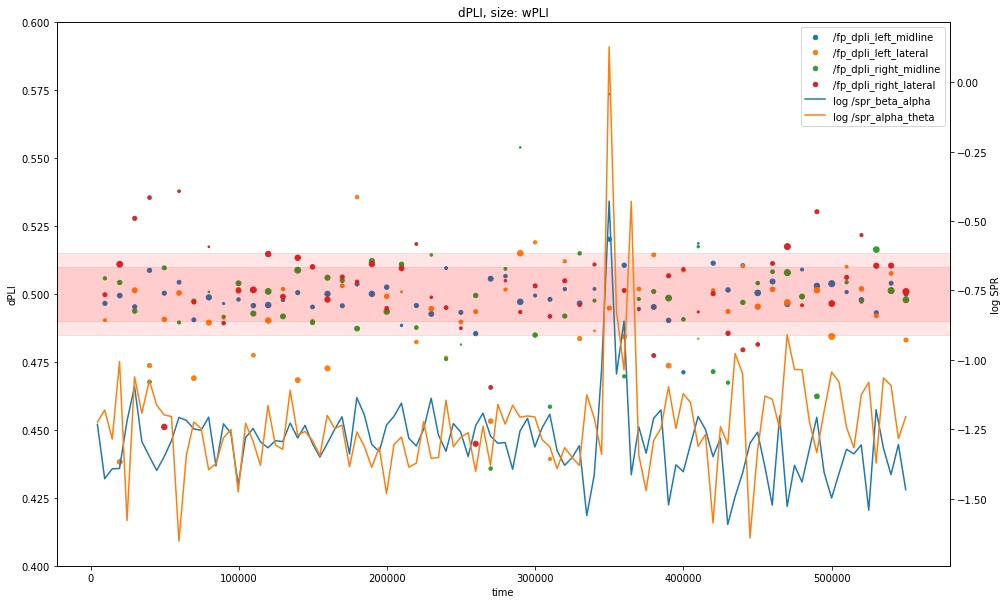

In [13]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set(ylim=(0.4, 0.6))
lm = plt.scatter(data.loc[data['address'] == channels[0]]['time'], data.loc[data['address'] == channels[0]]['value'], 
            s=data.loc[data['address'] == channels[4]]['value']*200)
ll = plt.scatter(data.loc[data['address'] == channels[1]]['time'], data.loc[data['address'] == channels[1]]['value'], 
            s=data.loc[data['address'] == channels[5]]['value']*200)
rm = plt.scatter(data.loc[data['address'] == channels[2]]['time'], data.loc[data['address'] == channels[2]]['value'], 
            s=data.loc[data['address'] == channels[6]]['value']*200)
rl = plt.scatter(data.loc[data['address'] == channels[3]]['time'], data.loc[data['address'] == channels[3]]['value'], 
            s=data.loc[data['address'] == channels[7]]['value']*200)
plt.ymin = 0.4
plt.ymax = 0.6
ax.set_ylabel('dPLI')
ax.set_xlabel('time')

plt.axhspan(0.485, 0.515, color='red', alpha=0.1)
plt.axhspan(0.49, 0.51, color='red', alpha=0.1)
plt.title('dPLI, size: wPLI')

ax2 = ax.twinx()
ba = plt.plot(data.loc[data['address'] == channels[13]]['time'], np.log(data.loc[data['address'] == channels[13]]['value']))
at = plt.plot(data.loc[data['address'] == channels[14]]['time'], np.log(data.loc[data['address'] == channels[14]]['value']))
ax2.set_ylabel('log SPR')
handles, labels = ax2.get_legend_handles_labels()

plt.legend((lm, ll, rm, rl, handles[0], handles[1]), (channels[0], channels[1], channels[2], channels[3], 'log ' + channels[13], 'log '
                                                       + channels[14]))

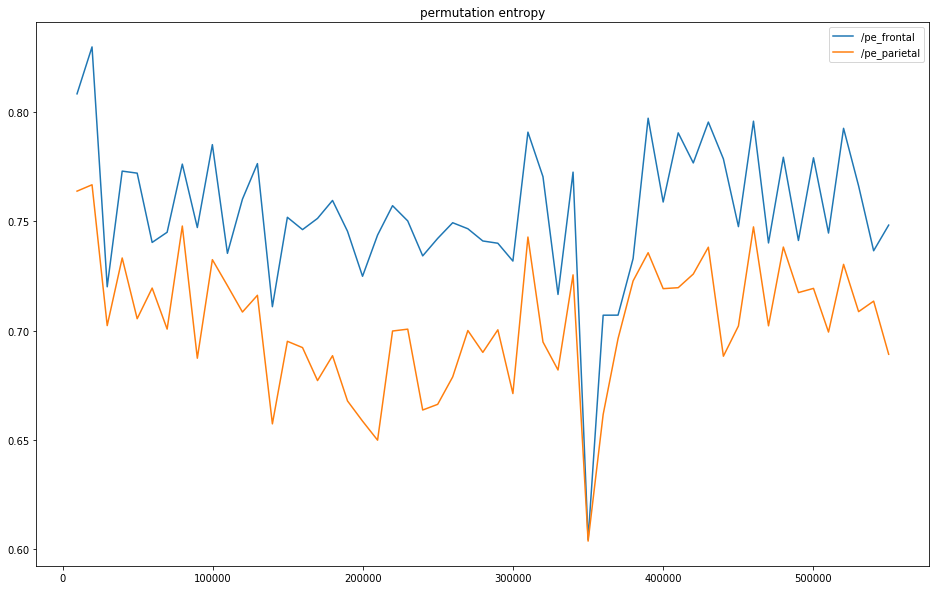

In [14]:
fig, ax = plt.subplots(figsize=(16,10))
pef = plt.plot(data.loc[data['address'] == channels[9]]['time'], data.loc[data['address'] == channels[9]]['value'], label=channels[9])
pep = plt.plot(data.loc[data['address'] == channels[10]]['time'], data.loc[data['address'] == channels[10]]['value'], label=channels[10])
plt.title('permutation entropy')
ax.legend()

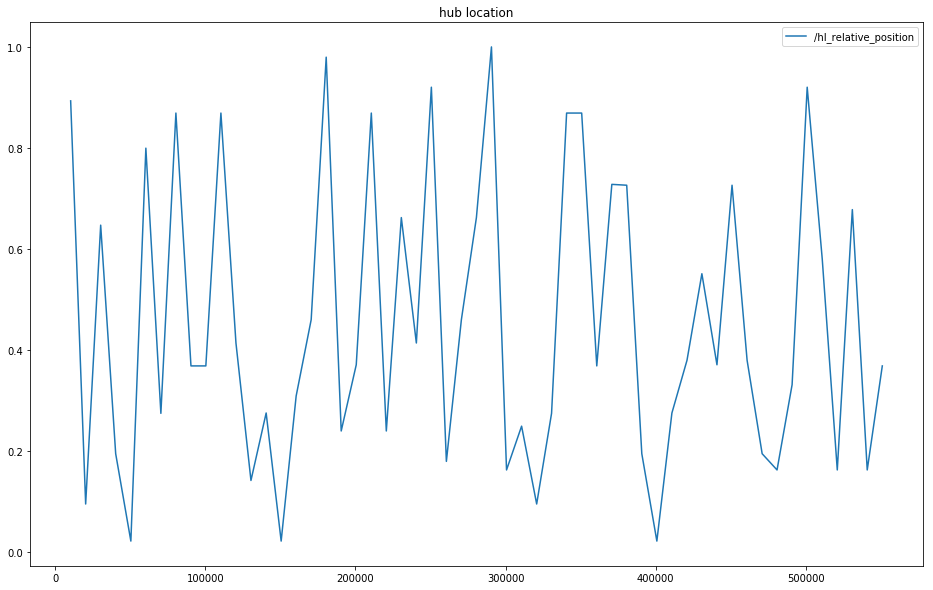

In [15]:
fig, ax = plt.subplots(figsize=(16,10))
hl = plt.plot(data.loc[data['address'] == channels[8]]['time'], data.loc[data['address'] == channels[8]]['value'], label=channels[8])
plt.title('hub location')
ax.legend()

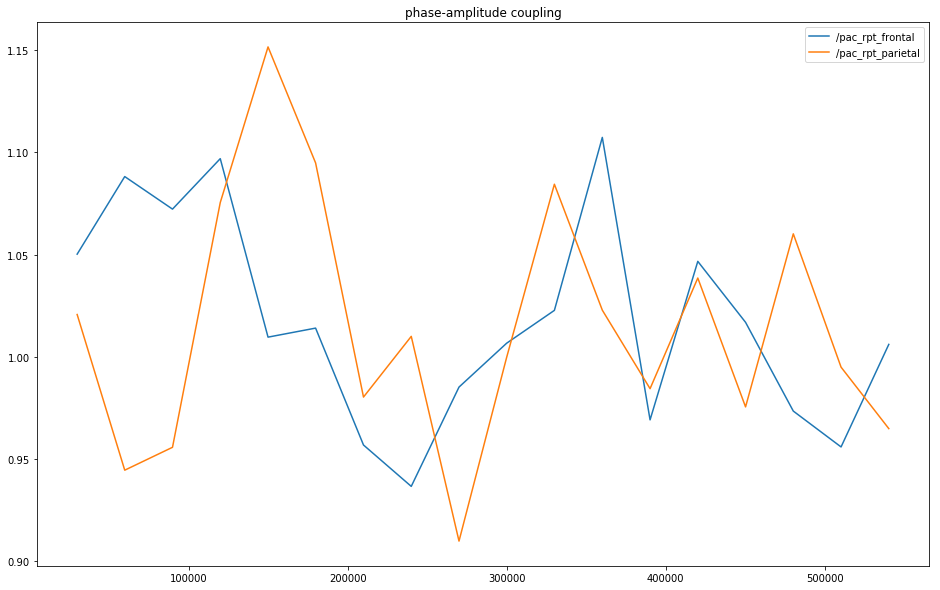

In [9]:
fig, ax = plt.subplots(figsize=(16,10))
pacf = plt.plot(data.loc[data['address'] == channels[11]]['time'], data.loc[data['address'] == channels[11]]['value'], label=channels[11])
pacp = plt.plot(data.loc[data['address'] == channels[12]]['time'], data.loc[data['address'] == channels[12]]['value'], label=channels[12])
plt.title('phase-amplitude coupling')
ax.legend()

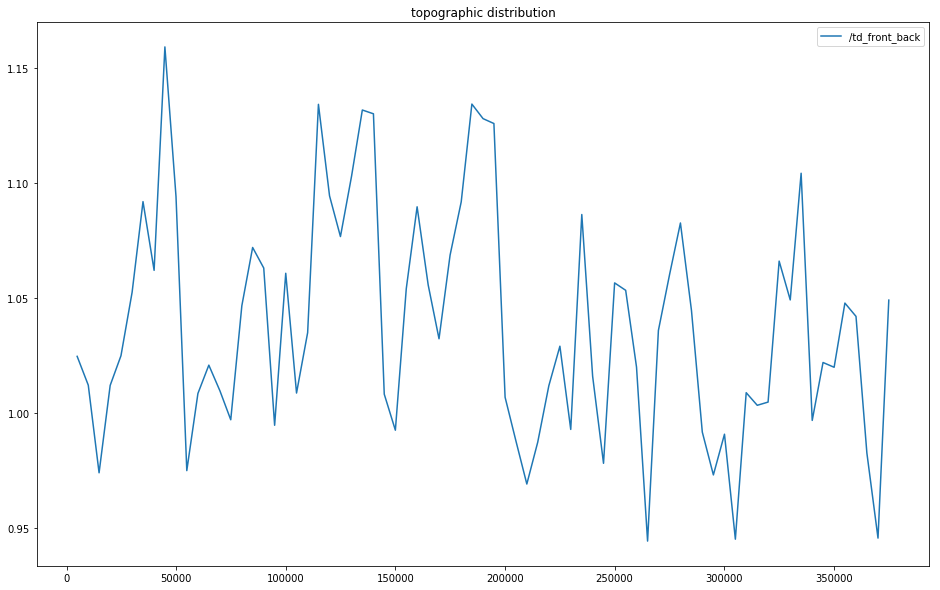

In [17]:
fig, ax = plt.subplots(figsize=(16,10))
td = plt.plot(data.loc[data['address'] == channels[15]]['time'], data.loc[data['address'] == channels[15]]['value'], label=channels[15])
plt.title('topographic distribution')
ax.legend()

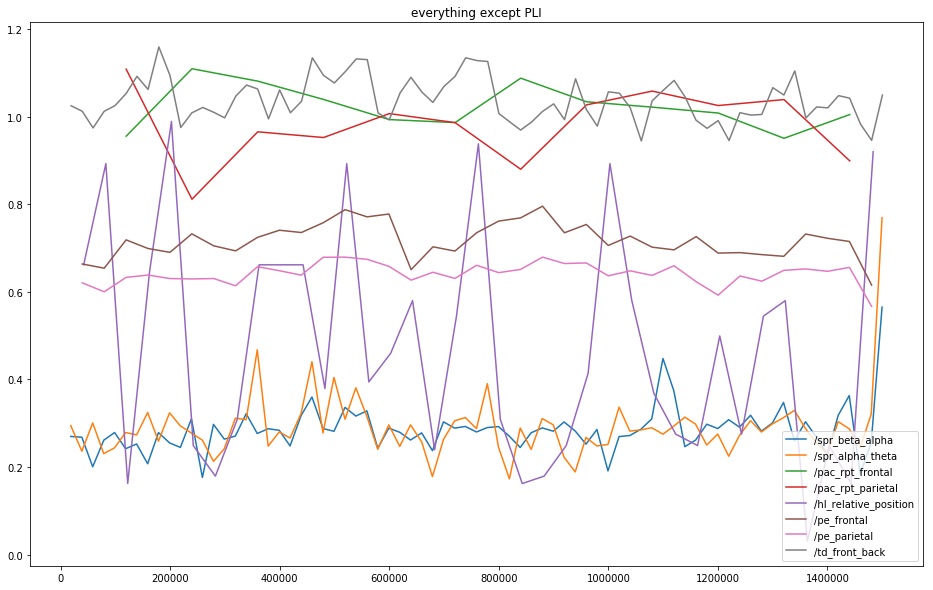

In [16]:
fig, ax = plt.subplots(figsize=(16,10))

ba = plt.plot(data.loc[data['address'] == channels[13]]['time'], data.loc[data['address'] == channels[13]]['value'], label=channels[13])
at = plt.plot(data.loc[data['address'] == channels[14]]['time'], data.loc[data['address'] == channels[14]]['value'], label=channels[14])
pacf = plt.plot(data.loc[data['address'] == channels[11]]['time'], data.loc[data['address'] == channels[11]]['value'], label=channels[11])
pacp = plt.plot(data.loc[data['address'] == channels[12]]['time'], data.loc[data['address'] == channels[12]]['value'], label=channels[12])
hl = plt.plot(data.loc[data['address'] == channels[8]]['time'], data.loc[data['address'] == channels[8]]['value'], label=channels[8])
pef = plt.plot(data.loc[data['address'] == channels[9]]['time'], data.loc[data['address'] == channels[9]]['value'], label=channels[9])
pep = plt.plot(data.loc[data['address'] == channels[10]]['time'], data.loc[data['address'] == channels[10]]['value'], label=channels[10])
td = plt.plot(data.loc[data['address'] == channels[15]]['time'], data.loc[data['address'] == channels[15]]['value'], label=channels[15])

plt.title('everything except PLI')
ax.legend()

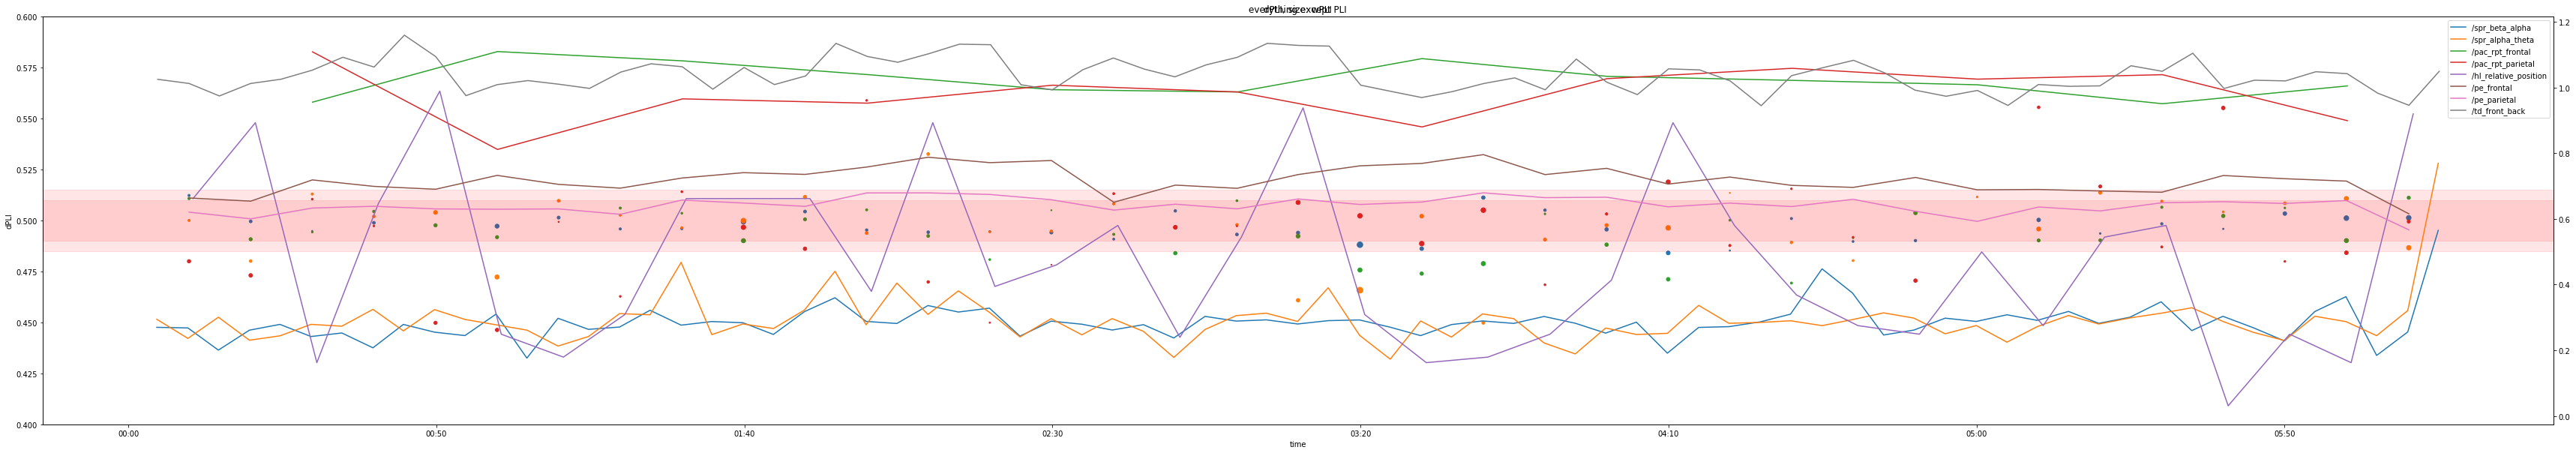

In [18]:
fig, ax = plt.subplots(figsize=(60,10))

ax.set(ylim=(0.4, 0.6))
lm = plt.scatter(data.loc[data['address'] == channels[0]]['time'], data.loc[data['address'] == channels[0]]['value'], 
            s=data.loc[data['address'] == channels[4]]['value']*200)
ll = plt.scatter(data.loc[data['address'] == channels[1]]['time'], data.loc[data['address'] == channels[1]]['value'], 
            s=data.loc[data['address'] == channels[5]]['value']*200)
rm = plt.scatter(data.loc[data['address'] == channels[2]]['time'], data.loc[data['address'] == channels[2]]['value'], 
            s=data.loc[data['address'] == channels[6]]['value']*200)
rl = plt.scatter(data.loc[data['address'] == channels[3]]['time'], data.loc[data['address'] == channels[3]]['value'], 
            s=data.loc[data['address'] == channels[7]]['value']*200)
plt.ymin = 0.4
plt.ymax = 0.6
ax.set_ylabel('dPLI')
ax.set_xlabel('time')

plt.axhspan(0.485, 0.515, color='red', alpha=0.1)
plt.axhspan(0.49, 0.51, color='red', alpha=0.1)
plt.title('dPLI, size: wPLI')

ax2 = ax.twinx()

ba = plt.plot(data.loc[data['address'] == channels[13]]['time'], data.loc[data['address'] == channels[13]]['value'], label=channels[13])
at = plt.plot(data.loc[data['address'] == channels[14]]['time'], data.loc[data['address'] == channels[14]]['value'], label=channels[14])
pacf = plt.plot(data.loc[data['address'] == channels[11]]['time'], data.loc[data['address'] == channels[11]]['value'], label=channels[11])
pacp = plt.plot(data.loc[data['address'] == channels[12]]['time'], data.loc[data['address'] == channels[12]]['value'], label=channels[12])
hl = plt.plot(data.loc[data['address'] == channels[8]]['time'], data.loc[data['address'] == channels[8]]['value'], label=channels[8])
pef = plt.plot(data.loc[data['address'] == channels[9]]['time'], data.loc[data['address'] == channels[9]]['value'], label=channels[9])
pep = plt.plot(data.loc[data['address'] == channels[10]]['time'], data.loc[data['address'] == channels[10]]['value'], label=channels[10])
td = plt.plot(data.loc[data['address'] == channels[15]]['time'], data.loc[data['address'] == channels[15]]['value'], label=channels[15])

plt.title('everything except PLI')

formatter = mpl.ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
ax.xaxis.set_major_formatter(formatter)

handles, labels = ax2.get_legend_handles_labels()
ax.legend(handles, labels)